# Introduction to linear regression

## Batter up

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

## The data

Let's load up the data for the 2011 season.

In [90]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
#import os, ssl
#if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#    getattr(ssl, '_create_unverified_context', None)): 
#    ssl._create_default_https_context = ssl._create_unverified_context
    
import pandas as pd

mlb11 = pd.read_csv('https://www.openintro.org/stat/data/mlb11.csv')

In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the newer variables on your own.

<div class = 'exercise'>
<h4>Exercise 1</h4>
What type of plot would you use to display the relationship between <code>runs</code> and one of the other numerical variables? Plot this relationship using the variable <code>at_bats</code> as the predictor. Does the relationship look linear? If you knew a team's <code>at_bats</code>, would you be comfortable using a linear model to predict the number of runs?
</div>

In [91]:
#showing first records
mlb11.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


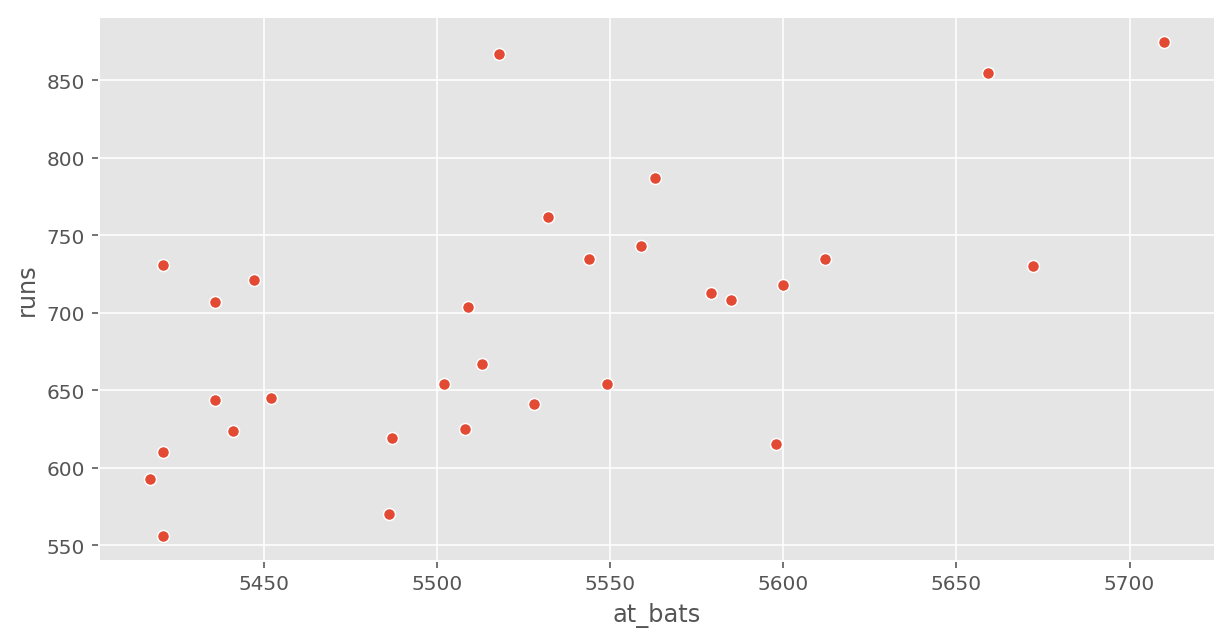

In [92]:
#plotting a linear regression
import seaborn as sns
sns.scatterplot(x="at_bats", y="runs", data=mlb11);

A scatter plot is used to display the relationship between at_bats and runs. The graph shows some linear association but it is not strong enought to say that I would be comfortable using a linear model to predict the number of runs with at_bats variable.

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [93]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

## Sum of squared residuals

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.
</div>

There seems to be a positive weak linear relationship between both variables considering the previous scatter plot and the fact that their correlation coefficient is 0.61.

Recall that the difference between the observed values and the values predicted by the line are called *residuals*. Note that the data set has 30 observations in total, hence there are 30 residuals.

#### ${e}$<sub>i</sub> = ${y}$<sub>i</sub>−$\bar{y}$<sub>i</sub>

To visualize the residuals of a linear regression, we can use `residplot()` function from `seaborn`:

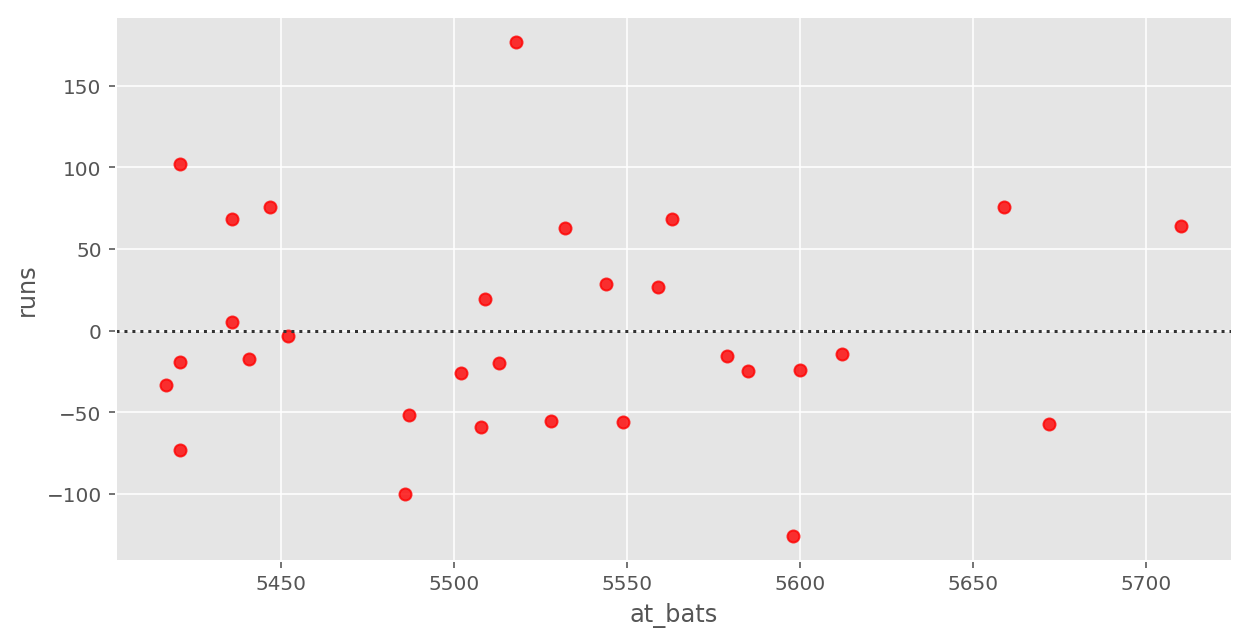

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(mlb11['at_bats'], mlb11['runs'], color = 'red')
plt.show();

## The linear model

In order to determine the best fit line we can use `statsmodel', a very useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [96]:
import statsmodels.api as sm

formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           0.000339
Time:                        12:41:15   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

Let's print the intercept and slope values.

In [97]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = -2789.242885442255
Slope = 0.6305499928382827


Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

#### ${y}$ = - 2789.2429 + 0.6305 x ${atbats}$

One last piece of information we will discuss from the summary output is the Multiple R-squared, or more simply, ${R}$<sup>2</sup>. The ${R}$<sup>2</sup> value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.

In [105]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.37286539018680676


<div class = 'exercise'>
<h4>Exercise 3</h4>
    Fit a new model that uses <code>homeruns</code> to predict <code>runs</code>. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?
</div>

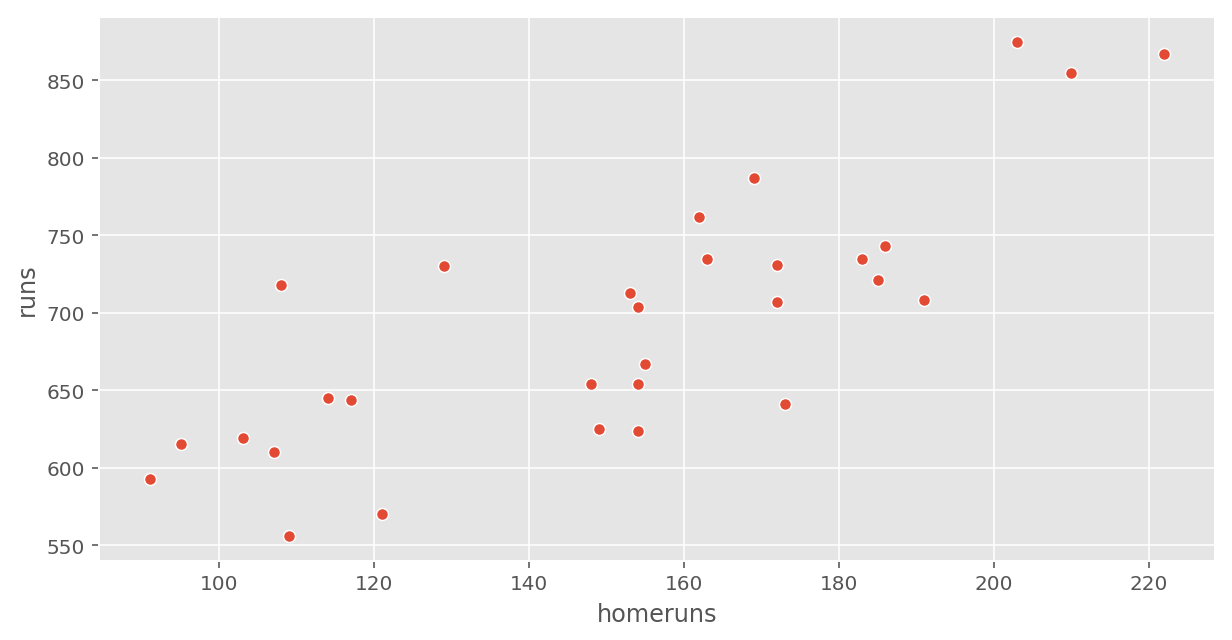

In [106]:
#first visualize in a regression plot
sns.scatterplot(x="homeruns", y="runs", data=mlb11);

In [107]:
#using statsmodel to get the variables for the regresion line
formula_string = "runs ~ homeruns"

model_ex3 = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted_ex3 = model_ex3.fit()

print(model_fitted_ex3.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           1.90e-07
Time:                        12:45:30   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.0

In [108]:
print('Intercept =', model_fitted_ex3.params[0])
print('Slope =', model_fitted_ex3.params[1])

Intercept = 415.2388849157227
Slope = 1.8345416196239706


#### ${y}$ = 415.2388 + 1.8345 x ${homeruns}$

The slope tell us that for every homerun the team will get 1.8345 more runs.

## Prediction and prediction errors

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Let's plot `at_bats` and `runs` on a scatter plot.

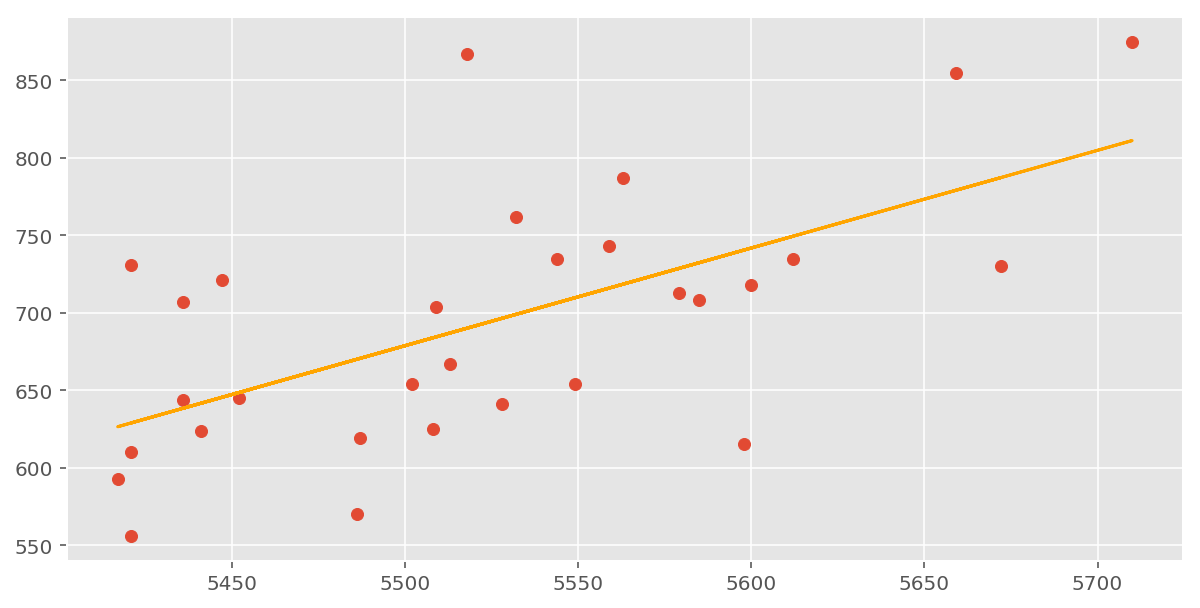

In [109]:
x = mlb11['at_bats']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

<div class = 'exercise'>
<h4>Exercise 4</h4>
If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?
</div>

Considering the function of the least square regression line above:
#### ${y}$ = - 2789.2429 + 0.6305 x ${atbats}$

In [110]:
# replacing 5578 in the formula
estimate_y=-2789.2429 + (0.6305 * 5578)
print('For 5,578 bats the team manager will predict ' + str(round(estimate_y,4)) + " runs")

For 5,578 bats the team manager will predict 727.6861 runs


In [111]:
#visualize the real data (order by at_bats)
mlb11.sort_values(by=['at_bats'])

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
28,San Diego Padres,593,5417,1284,91,0.237,1320,170,71,0.305,0.349,0.653
29,Seattle Mariners,556,5421,1263,109,0.233,1280,125,67,0.292,0.348,0.640
22,Pittsburgh Pirates,610,5421,1325,107,0.244,1308,108,72,0.309,0.368,0.676
18,Arizona Diamondbacks,731,5421,1357,172,0.250,1249,133,94,0.322,0.413,0.736
24,Tampa Bay Rays,707,5436,1324,172,0.244,1193,155,91,0.322,0.402,0.724
11,Los Angeles Dodgers,644,5436,1395,117,0.257,1087,126,82,0.322,0.375,0.697
26,Washington Nationals,624,5441,1319,154,0.242,1323,106,80,0.309,0.383,0.691
7,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
23,Oakland Athletics,645,5452,1330,114,0.244,1094,117,74,0.311,0.369,0.680
27,San Francisco Giants,570,5486,1327,121,0.242,1122,85,86,0.303,0.368,0.671


We can see that Philadelphia Phillies have a very close number of at_bats with 5579 and they have 713. If we take that as the real data, the regression line is overestimating the data by 14.6861 (713 - 727.6861). This shows a negative residual. 

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

*Linearity*: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. at-bats.

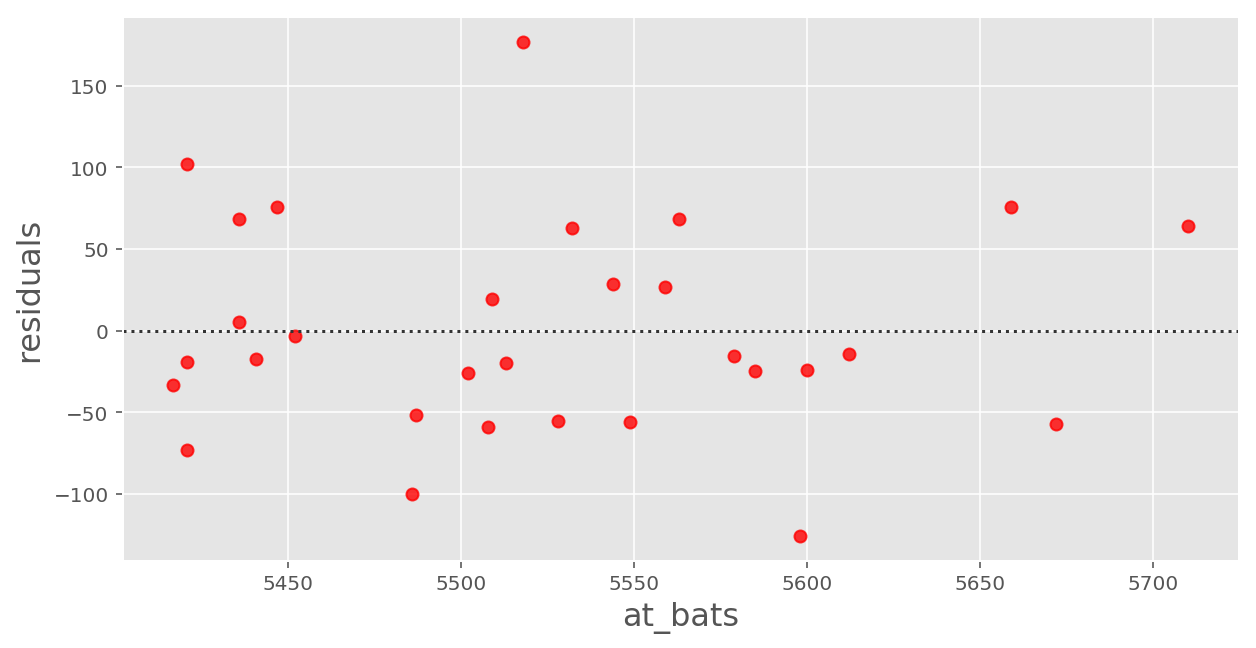

In [112]:
import seaborn as sns
sns.residplot(x, y, color = 'red')
plt.xlabel('at_bats', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

<div class = 'exercise'>
<h4>Exercise 5</h4>
Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?
</div>

We can see that there is not a clear pattern in the residual plot, sugesting that there is a linear relationship between the 2 variables.

*Nearly normal residuals*: To check this condition, we can look at a histogram.

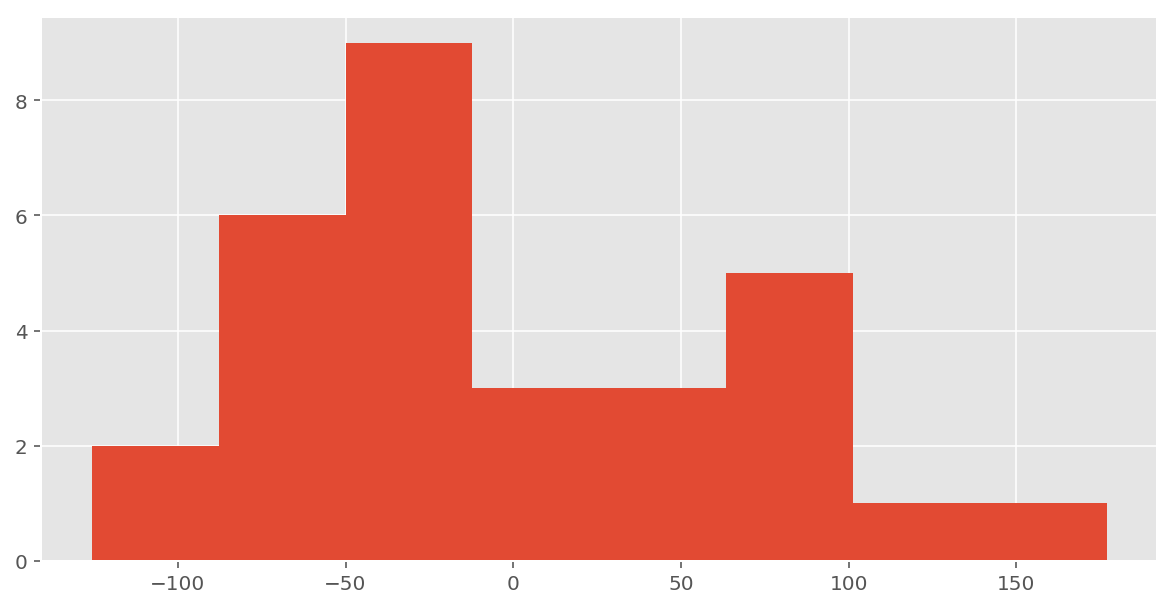

In [113]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

or a normal probability plot of the residuals.

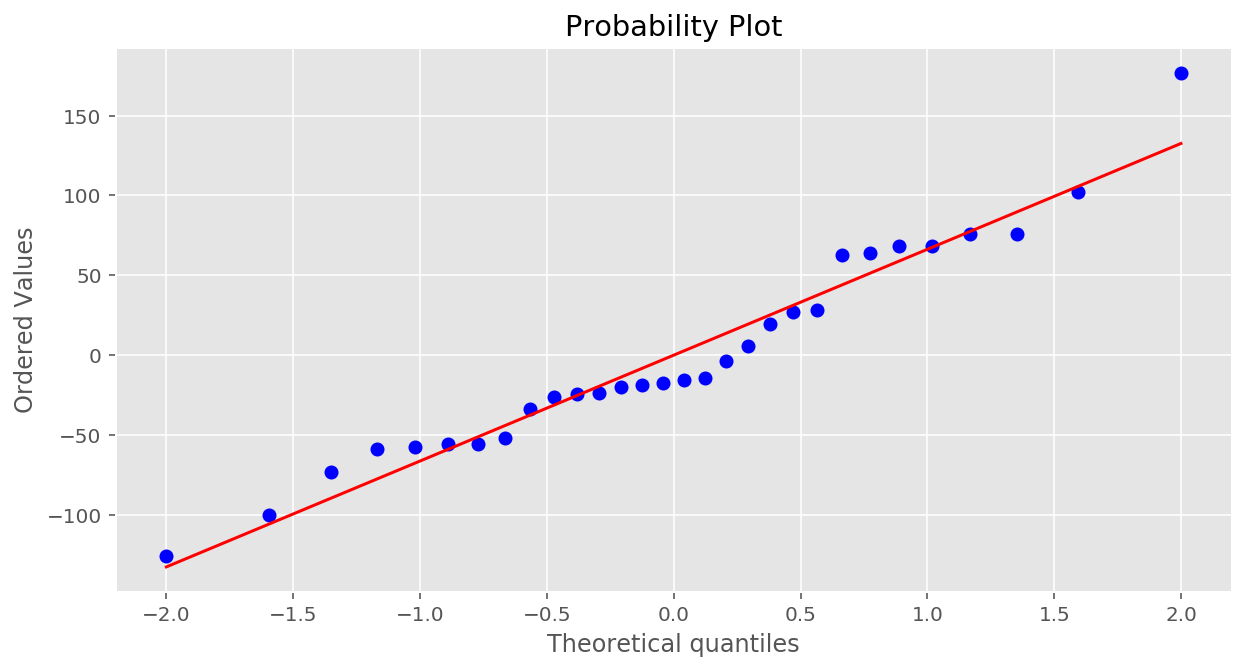

In [37]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

<div class = 'exercise'>
<h4>Exercise 6</h4>
Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?</div>

The histogram shows a right skewed, but considering this graph along with the normal probability ploy the residuals can still be considered to be nearly normal.

*Constant variability*:

<div class = 'exercise'>
<h4>Exercise 7</h4>
Based on the plot in (1), does the constant variability condition appear to be met?
    </div>

Yes, according to the residual plot the constant variability condition appears to be met.

---
## On Your Own

1. Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

In [114]:
# taking "hits" as the variable to predict runs
formula_string = "runs ~ hits"

model_1 = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted_1 = model_1.fit()

print(model_fitted_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.20
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           1.04e-07
Time:                        12:51:03   Log-Likelihood:                -159.03
No. Observations:                  30   AIC:                             322.1
Df Residuals:                      28   BIC:                             324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.5600    151.181     -2.484      0.0

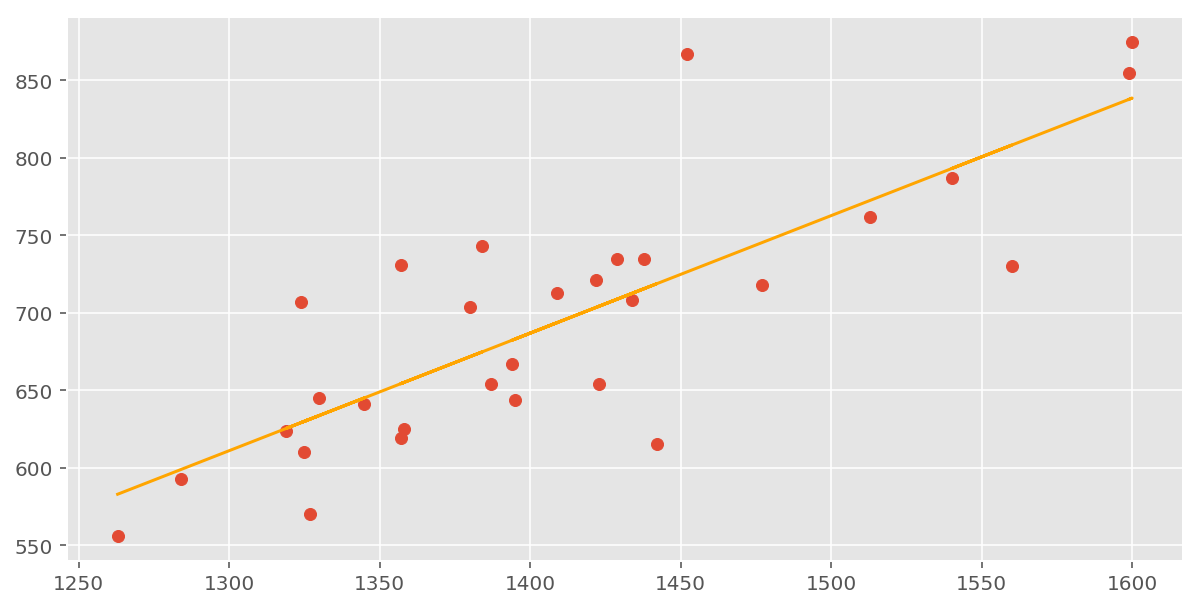

In [115]:
x = mlb11['hits']
y = mlb11['runs']

y_pred = model_fitted_1.predict(x)

plt.scatter(mlb11['hits'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

At first glance, using "hits" as the predictor for "runs" it seems to be a linear relationship.

2. How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell?

Looking at the summary statistic from the previous answer, the R squared value from the model using __hits__ as the predictor is 64.2% , whereas the one that has __at_bats__ is 37.3%, suggesting that hits is better accounts for higher percentage of the variability of the response variable.

3. Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).

At the beginning of this notebook, it was stated that, in addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. We already used at_bats, hits and home runs, so batting average, strikeouts, stolen bases, and wins are remaining.

In [44]:
# taking a look at column names
mlb11.columns

Index(['team', 'runs', 'at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts',
       'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs'],
      dtype='object')

In [62]:
# getting correlation values for each other standard variable 
print(mlb11['runs'].corr(mlb11['hits']))
print(mlb11['runs'].corr(mlb11['bat_avg']))
print(mlb11['runs'].corr(mlb11['strikeouts']))
print(mlb11['runs'].corr(mlb11['stolen_bases']))
print(mlb11['runs'].corr(mlb11['wins']))

0.8012108132317111
0.8099858854615081
-0.41153120445029745
0.05398141037962954
0.6008087711133059


Displaying R squared values (already calculated and will display only the highest value statistic summary below):
- hits = 0.642
- bat_avg = 0.656
- strikeouts = 0.169
- stolen_bases = 0.003
- wins = 0.361

Taking the one with the highest R squared, bat_avg.

In [116]:
# batting average
formula_string = "runs ~ bat_avg"

model_a = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted_a = model_a.fit()

print(model_fitted_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     53.41
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           5.88e-08
Time:                        12:54:42   Log-Likelihood:                -158.43
No. Observations:                  30   AIC:                             320.9
Df Residuals:                      28   BIC:                             323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -642.8189    183.080     -3.511      0.0

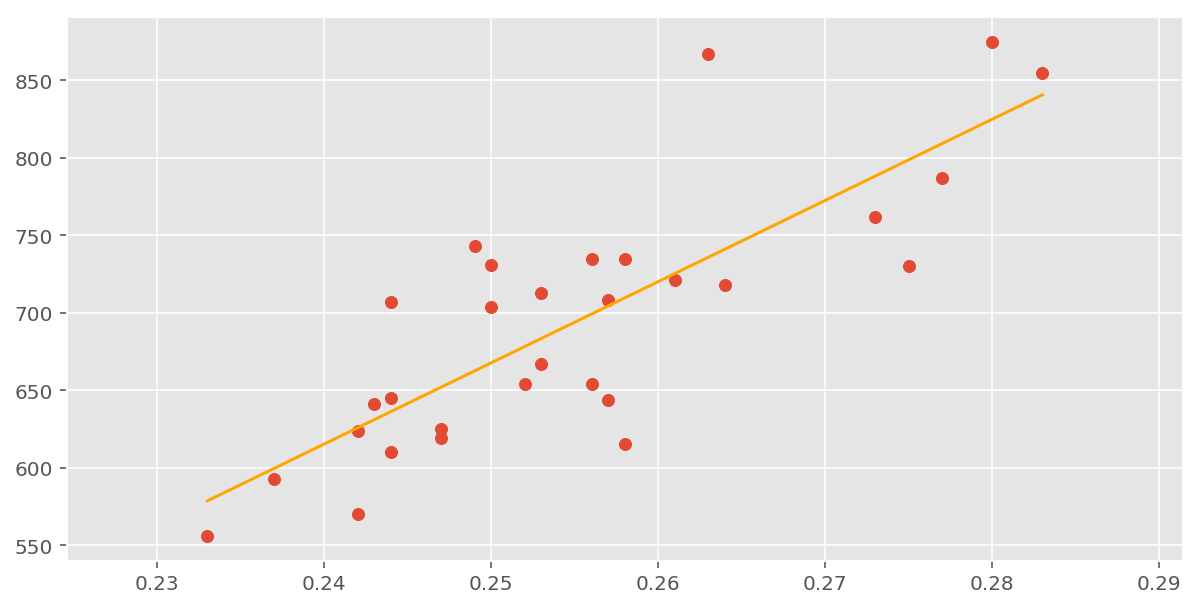

In [117]:
x = mlb11['bat_avg']
y = mlb11['runs']

y_pred = model_fitted_a.predict(x)

plt.scatter(mlb11['bat_avg'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

Batting average seems to be the variable that best predicts runs with a correlation value of 0.8099 and R squared of 65.6%.

4. Now examine the three newer variables. These are the statistics used by the author of <i>Moneyball</i> to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we've analyzed, which seems to be the best predictor of <code>runs</code>? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?

There three newer variables are: on-base percentage, slugging percentage, and on-base plus slugging

In [118]:
# getting correlation values for the newer variables
print(mlb11['runs'].corr(mlb11['new_onbase']))
print(mlb11['runs'].corr(mlb11['new_slug']))
print(mlb11['runs'].corr(mlb11['new_obs']))

0.9214690724306157
0.9470324009291543
0.9669162974900227


In [119]:
# on-base percentage
formula_string = "runs ~ new_onbase"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     157.6
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           5.12e-13
Time:                        12:55:05   Log-Likelihood:                -146.07
No. Observations:                  30   AIC:                             296.1
Df Residuals:                      28   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1118.4198    144.480     -7.741      0.0

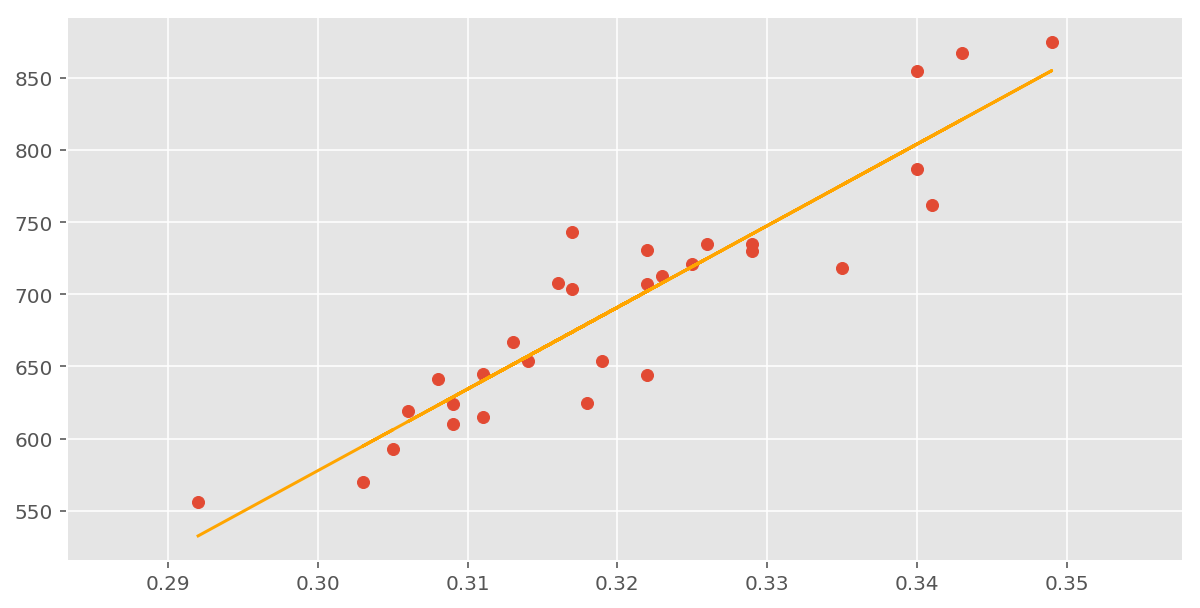

In [120]:
x = mlb11['new_onbase']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['new_onbase'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

In [121]:
# slugging percentage
formula_string = "runs ~ new_slug"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     243.5
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           2.42e-15
Time:                        12:55:28   Log-Likelihood:                -140.36
No. Observations:                  30   AIC:                             284.7
Df Residuals:                      28   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.8041     68.708     -5.470      0.0

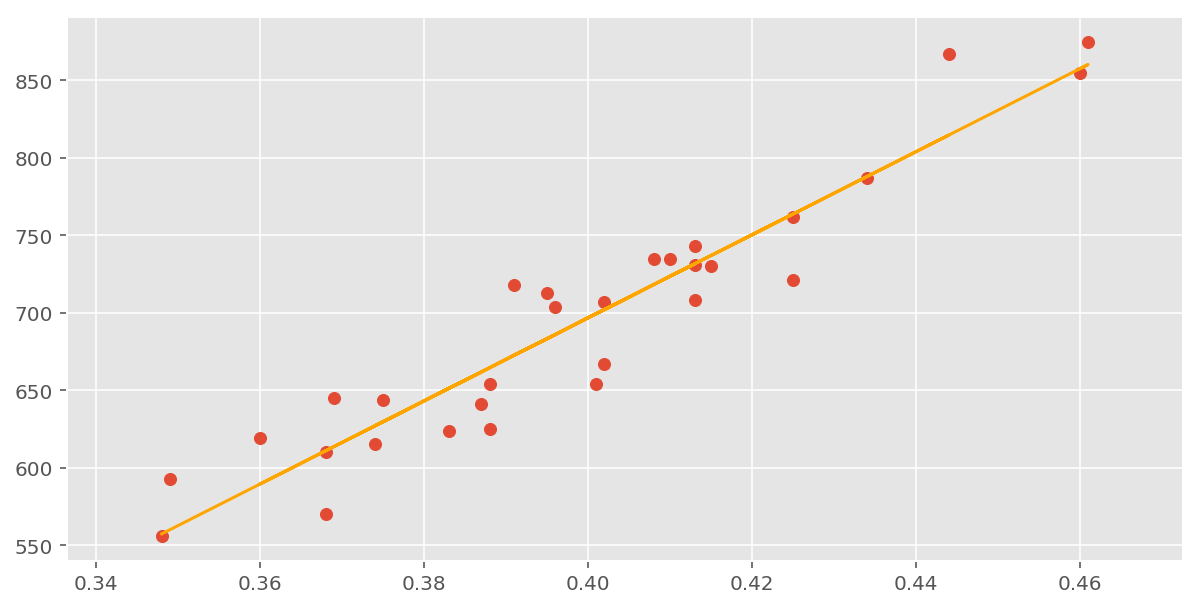

In [122]:
x = mlb11['new_slug']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['new_slug'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

In [123]:
# on-base plus slugging
formula_string = "runs ~ new_obs"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     402.3
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           3.76e-18
Time:                        12:55:30   Log-Likelihood:                -133.45
No. Observations:                  30   AIC:                             270.9
Df Residuals:                      28   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -686.6143     68.925     -9.962      0.0

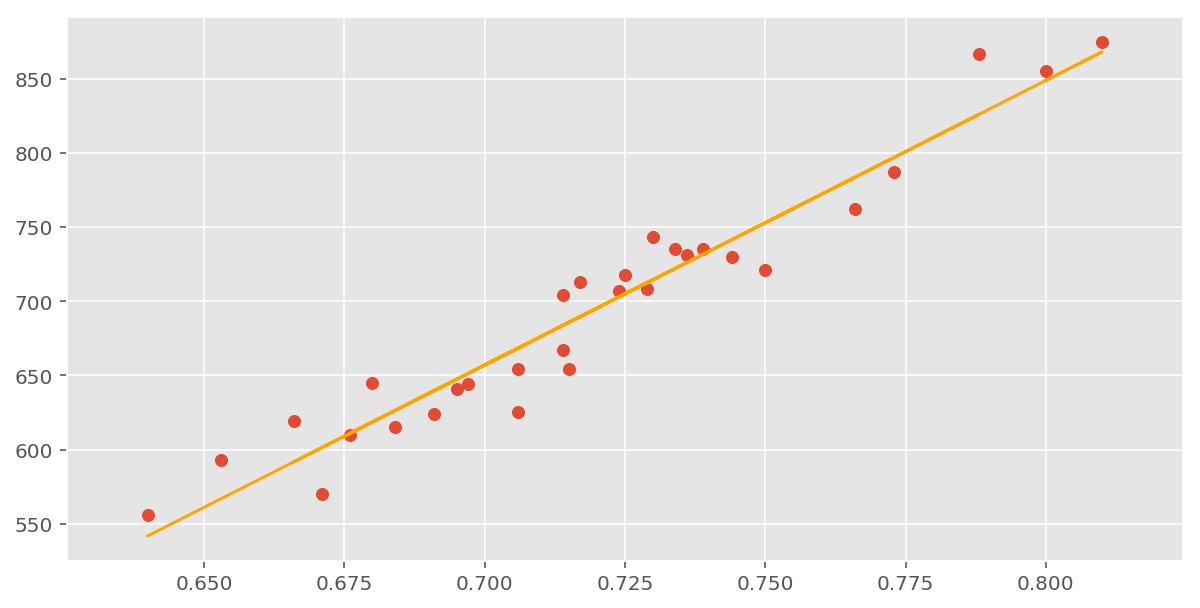

In [124]:
x = mlb11['new_obs']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['new_obs'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

Of all ten variables we've analyzed, on-base plus slugging to be the best predictor of runs with a correlation of 0.9669 and a R squared value of 93.5%. And considering the scatter plot above we can see a strong linear relationship between the two variables.
Considering that this variable represents the ability of a player to get both, on base and to hit for power, these are two important offensive skills and it makes sense that this represents a good predictor for runs. An OPS of .900 or higher in Major League Baseball puts the player in the upper echelon of hitters (wikipedia).

5. Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code>

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

Linearity: we already checked if the relationship between runs and new_obs is linear using a scatterplot, and it was met. We should also verify this condition with a plot of the residuals vs. new_obs.

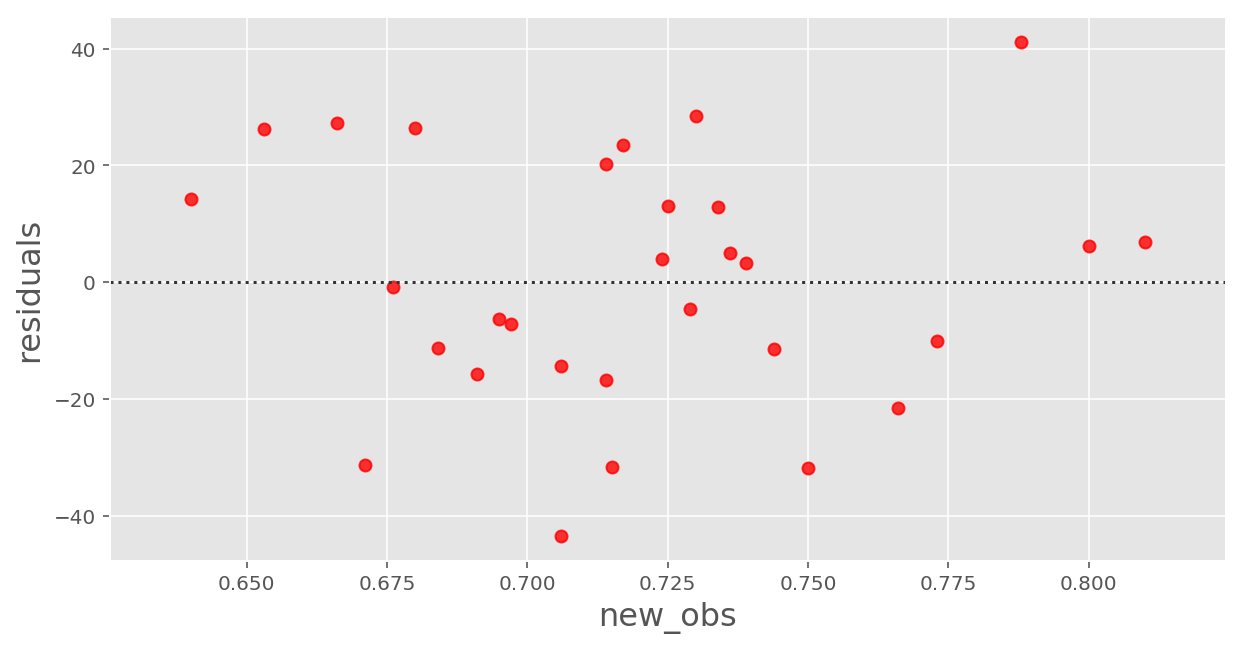

In [125]:
sns.residplot(x, y, color = 'red')
plt.xlabel('new_obs', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

We can see that there is not a clear pattern in the residual plot, sugesting that there is a linear relationship between the 2 variables.<br>
Nearly normal residuals: To check this condition, we can look at a histogram and probability plot.

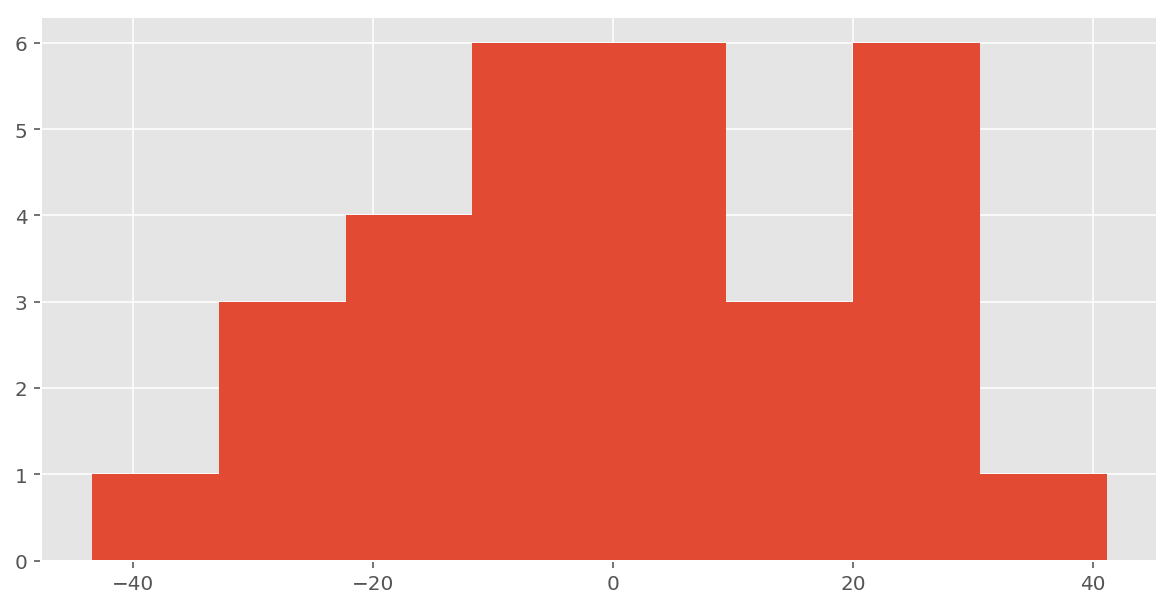

In [128]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

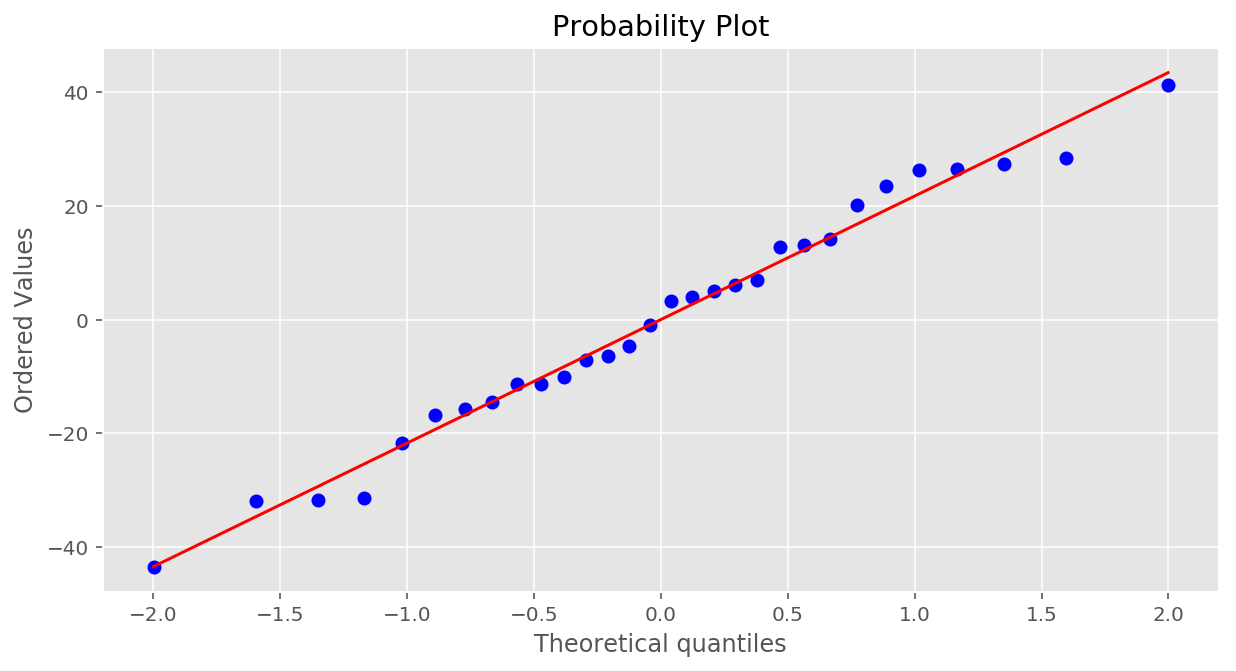

In [129]:
probplot(residuals, plot = plt)
plt.show(); 

We can see that the histogram and probability plot show nearly normal residuals.

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com